In [2]:
#importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



In [3]:
#loading the dataset

df=pd.read_csv('smoking_analytics.csv')
df.head()

,age,height,weight,bmi,cholesterol,blood_pressure_systolic,blood_pressure_diastolic,smoking_status,exercise_frequency,alcohol_intake,stress_level,family_history,gender,income_level,diet_quality
0,55,186,98,30.232847,239.579287,98,89,Non-smoker,5,5.488418,1.758435,Has history,Male,136584,5.005999
1,62,151,68,24.100768,215.318719,165,112,Non-smoker,6,5.383264,8.306755,No history,Female,27883,6.707159
2,75,197,61,28.370737,184.905242,104,78,Non-smoker,4,5.650738,7.470163,Has history,Male,39708,2.140495
3,68,195,64,24.502236,246.622573,110,112,Non-smoker,6,9.487049,7.566460,Has history,Female,66221,7.597218
4,79,163,80,23.176894,230.161949,141,75,Smoker,2,9.022456,1.902172,No history,Male,37197,3.422891


In [5]:
#Basic info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       600 non-null    int64  
 1   height                    600 non-null    int64  
 2   weight                    600 non-null    int64  
 3   bmi                       600 non-null    float64
 4   cholesterol               600 non-null    float64
 5   blood_pressure_systolic   600 non-null    int64  
 6   blood_pressure_diastolic  600 non-null    int64  
 7   smoking_status            600 non-null    object 
 8   exercise_frequency        600 non-null    int64  
 9   alcohol_intake            600 non-null    float64
 10  stress_level              600 non-null    float64
 11  family_history            600 non-null    object 
 12  gender                    600 non-null    object 
 13  income_level              600 non-null    int64  
 14  diet_quali

In [6]:
#statistical description
df.describe(include='all')

,age,height,weight,bmi,cholesterol,blood_pressure_systolic,blood_pressure_diastolic,smoking_status,exercise_frequency,alcohol_intake,stress_level,family_history,gender,income_level,diet_quality
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600,600.00000,600.000000,600.000000,600,600,600.000000,600.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,2,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Smoker,NaN,NaN,NaN,Has history,Female,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325,NaN,NaN,NaN,311,307,NaN,NaN
mean,47.916667,174.773333,83.545000,26.496314,201.723889,135.098333,89.691667,NaN,3.03500,4.952324,5.514539,NaN,NaN,83733.466667,5.597547
std,18.060085,14.372528,19.821355,4.943426,28.429422,26.572332,17.061020,NaN,1.97068,2.821037,2.621308,NaN,NaN,38172.403775,2.571452
min,18.000000,150.000000,50.000000,18.049499,150.539854,90.000000,60.000000,NaN,0.00000,0.009058,1.002168,NaN,NaN,20020.000000,1.031830
25%,32.000000,162.750000,66.750000,22.491718,177.360261,111.000000,75.000000,NaN,1.00000,2.527447,3.258955,NaN,NaN,50415.000000,3.421805
50%,48.000000,175.000000,83.000000,26.597148,202.803032,137.000000,89.000000,NaN,3.00000,4.957468,5.478285,NaN,NaN,82370.500000,5.658373
75%,64.000000,187.000000,101.000000,30.876751,226.167464,158.000000,104.000000,NaN,5.00000,7.376220,7.843011,NaN,NaN,117586.000000,7.830525


In [7]:
#printing the column names and dimensions

print('Columns:',df.columns)
print('Number of rows:',df.shape[0])
print('Number of columns:',df.shape[1])

Columns: Index(['age', 'height', 'weight', 'bmi', 'cholesterol',
       'blood_pressure_systolic', 'blood_pressure_diastolic', 'smoking_status',
       'exercise_frequency', 'alcohol_intake', 'stress_level',
       'family_history', 'gender', 'income_level', 'diet_quality'],
      dtype='object')
Number of rows: 600
Number of columns: 15


In [8]:
#Check for missing values

print(df.isnull().sum())

age                         0
height                      0
weight                      0
bmi                         0
cholesterol                 0
blood_pressure_systolic     0
blood_pressure_diastolic    0
smoking_status              0
exercise_frequency          0
alcohol_intake              0
stress_level                0
family_history              0
gender                      0
income_level                0
diet_quality                0
dtype: int64


In [9]:
#Coverting categorical variable to numeric using  label encoder(converted to binary values ,1-presence , 0-absence)

label=LabelEncoder()
df['gender']=label.fit_transform(df['gender']) #0 
df['smoking_status']=label.fit_transform(df['smoking_status'])
df['family_history']=label.fit_transform(df['family_history'])

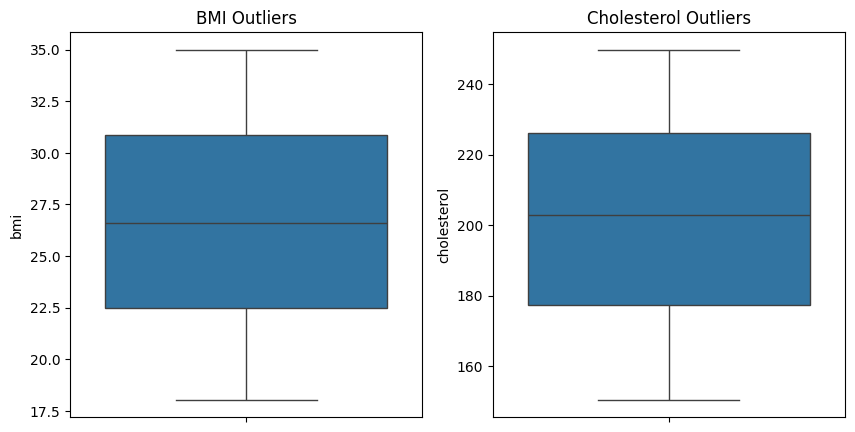

In [10]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(df['bmi'])
plt.title('BMI Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(df['cholesterol'])
plt.title('Cholesterol Outliers')

plt.show()


In [11]:
#Data Analysis
#smoking status by gender

smoking_by_gender=df.groupby('gender')['smoking_status'].value_counts(normalize=True).unstack()
smoking_by_gender

smoking_status,0,1
gender,,
0,0.462541,0.537459
1,0.453925,0.546075


In [12]:
#Average age of smokers vs non smokers
average_age=df.groupby('smoking_status')['age'].mean()
print("\nAverage Age by Smoking Status:")
for status, age in average_age.items():
    status_label = "Non-Smoker" if status == 0 else "Smoker" 
    print(f"{status_label}: Average Age = {age:.2f}")


Average Age by Smoking Status:
Non-Smoker: Average Age = 48.09
Smoker: Average Age = 47.77


In [13]:
#smoking and exercizing frequency
smoking_by_exercise=df.groupby(['exercise_frequency','smoking_status']).size().unstack()
smoking_by_exercise

smoking_status,0,1
exercise_frequency,,
0,38,45
1,39,42
2,38,44
3,37,53
4,44,50
5,44,46
6,35,45


In [14]:
#Correlation between age and bmi(body mass index)

corr_age_bmi=df['age'].corr(df['bmi'])
print(f"Correlation between Age and BMI:{corr_age_bmi:.3f}")

Correlation between Age and BMI:-0.055


In [15]:
#smoking status by cholesterol level

smoking_by_cholesterol=df.groupby('cholesterol')['smoking_status'].value_counts(normalize=True).unstack()*100
print(smoking_by_cholesterol)

smoking_status      0      1
cholesterol                 
150.539854        NaN  100.0
150.544371        NaN  100.0
150.652541        NaN  100.0
150.800814      100.0    NaN
151.351727        NaN  100.0
...               ...    ...
248.973660      100.0    NaN
249.071256      100.0    NaN
249.277099      100.0    NaN
249.629680        NaN  100.0
249.758259        NaN  100.0

[600 rows x 2 columns]


In [16]:
#Comparison of BMI between smokers and non-smokers

average_bmi=df.groupby('smoking_status')['bmi'].mean()
print(average_bmi)

smoking_status
0    26.548429
1    26.452218
Name: bmi, dtype: float64


In [17]:
#Count of smokers by family history
smoking_by_family_history=df.groupby(['family_history','smoking_status']).size().unstack()
print(smoking_by_family_history)

smoking_status    0    1
family_history          
0               143  168
1               132  157


In [18]:
#average stress level by smoking status

average_stress=df.groupby('smoking_status')['stress_level'].mean().round(2)
print(average_stress)

smoking_status
0    5.71
1    5.35
Name: stress_level, dtype: float64


In [19]:
#impact of income level on smoking status

df_copy=df.copy()

def categorize_income(income):
    if income<25000:
        return 'Low Income'
    elif 25000 <= income < 50000:
        return 'Medium Income'
    else:
        return 'High Income'

df_copy['income_category']=df_copy['income_level'].apply(categorize_income)

smoking_by_income_category=df_copy.groupby('income_category')['smoking_status'].value_counts(normalize=True).unstack()*100
print(smoking_by_income_category)

smoking_status           0          1
income_category                      
High Income      43.392070  56.607930
Low Income       57.142857  42.857143
Medium Income    52.800000  47.200000


In [20]:
#diet quality and smoking status correlation

smoking_by_diet_quality= df.groupby('diet_quality')['smoking_status'].value_counts(normalize=True).unstack()*100
print(smoking_by_diet_quality)

smoking_status      0      1
diet_quality                
1.031830          NaN  100.0
1.054750          NaN  100.0
1.143041          NaN  100.0
1.164412          NaN  100.0
1.169059          NaN  100.0
...               ...    ...
9.949879          NaN  100.0
9.959933        100.0    NaN
9.974841        100.0    NaN
9.977934        100.0    NaN
9.991817          NaN  100.0

[600 rows x 2 columns]


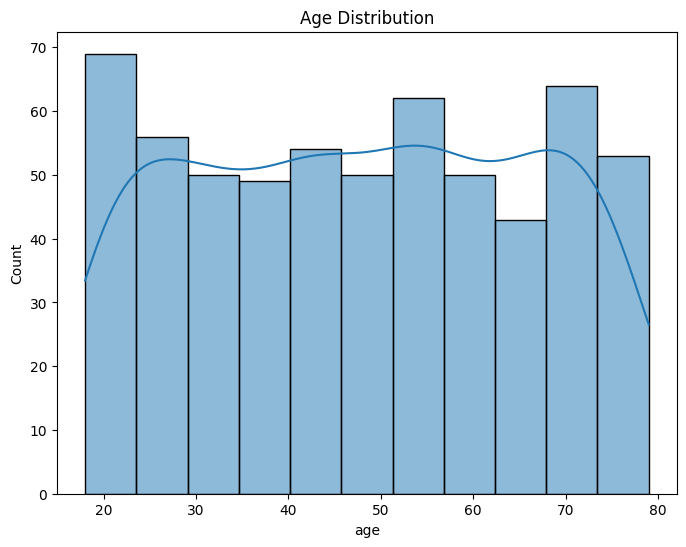

In [21]:
#Data Visualization
#Univariate Analysis
#Age distribution

plt.figure(figsize=(8,6))
sns.histplot(df['age'],kde=True)
plt.title("Age Distribution")
plt.show()

Text(0.5, 1.0, 'Gender Count')

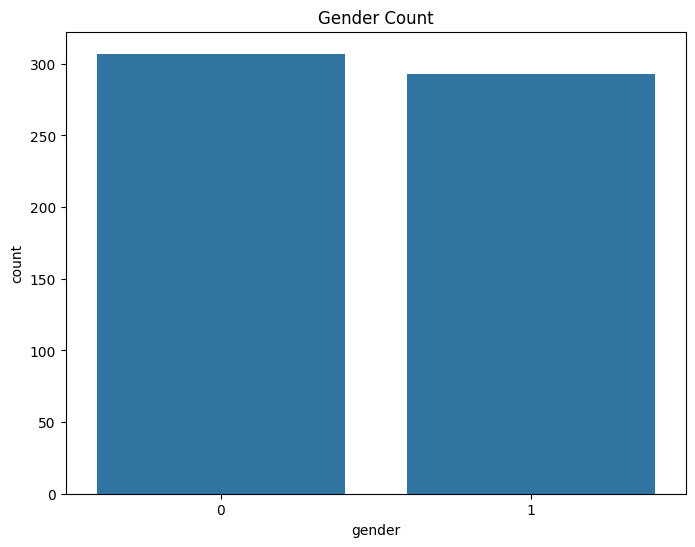

In [22]:
#Countplot for Gender:
plt.figure(figsize=(8,6))
sns.countplot(x='gender',data=df)
plt.title('Gender Count')

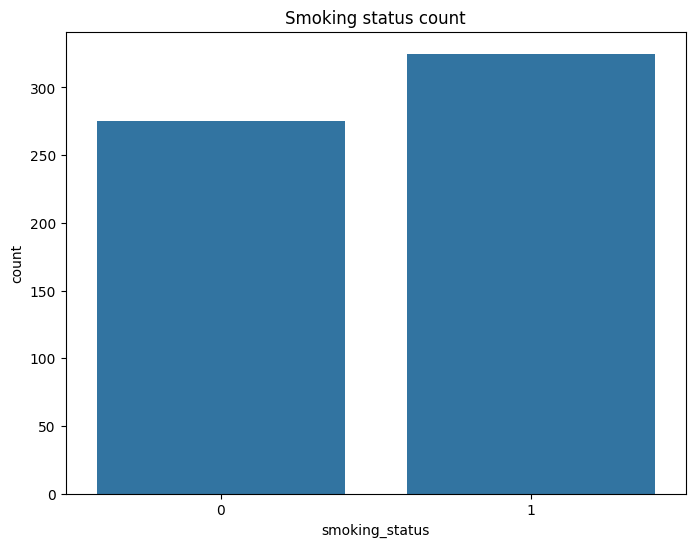

In [23]:
#Countplot for smoking status

plt.figure(figsize=(8,6))
sns.countplot(x='smoking_status',data=df)
plt.title('Smoking status count')
plt.show()

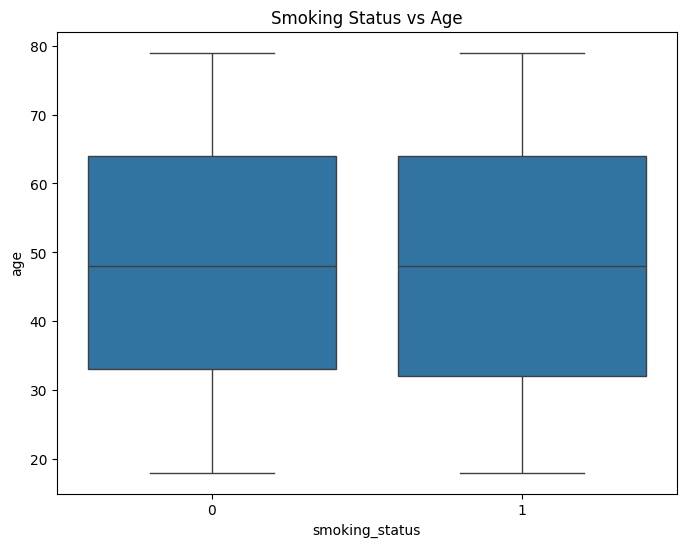

In [24]:
#Bivariate Analysis
#Smoking vs Age
plt.figure(figsize=(8,6))
sns.boxplot(x='smoking_status',y='age',data=df)
plt.title("Smoking Status vs Age")
plt.show()

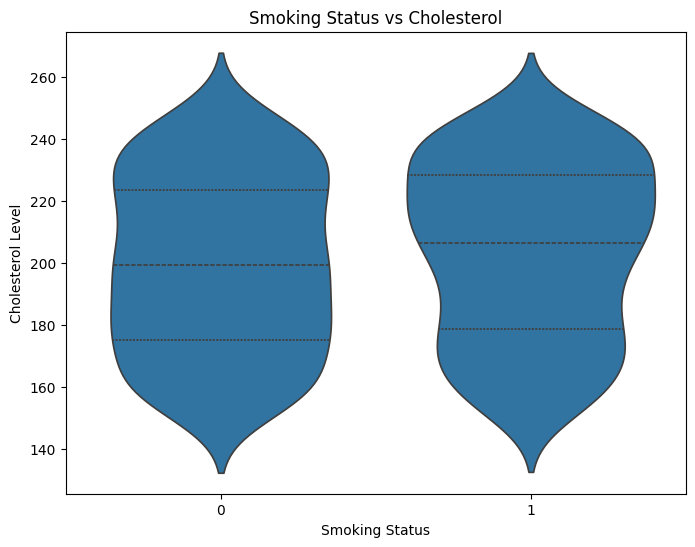

In [49]:
#Smoking vs Cholesterol

plt.figure(figsize=(8, 6))
sns.violinplot(x='smoking_status', y='cholesterol', data=df, inner='quartile')
plt.title("Smoking Status vs Cholesterol")
plt.xlabel("Smoking Status")
plt.ylabel("Cholesterol Level")
plt.show()

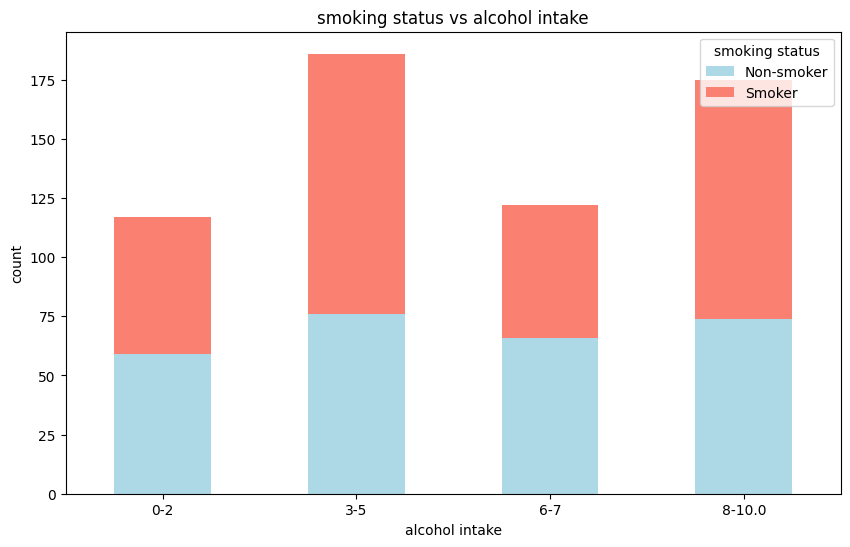

In [53]:
#smoking status vs alcohol intake 

max_alcohol_intake=df['alcohol_intake'].max()
bins=[0,2,5,7,max_alcohol_intake]
labels=['0-2','3-5','6-7',f'8-{round(max_alcohol_intake,1)}']
df['alcohol_intake_binned']=pd.cut(df['alcohol_intake'],bins=bins,labels=labels,include_lowest=True)
smoking_alcohol_binned=df.groupby(['alcohol_intake_binned','smoking_status'],observed=False).size().unstack(fill_value=0)
smoking_alcohol_binned.plot(kind='bar',stacked=True,figsize=(10,6),color=['lightblue','salmon'])
plt.title('smoking status vs alcohol intake')
plt.xlabel('alcohol intake')
plt.ylabel('count')
plt.legend(title='smoking status', loc='upper right',labels=['Non-smoker','Smoker'])
plt.xticks(rotation=0)
plt.show()
df=df.drop('alcohol_intake_binned',axis=1)



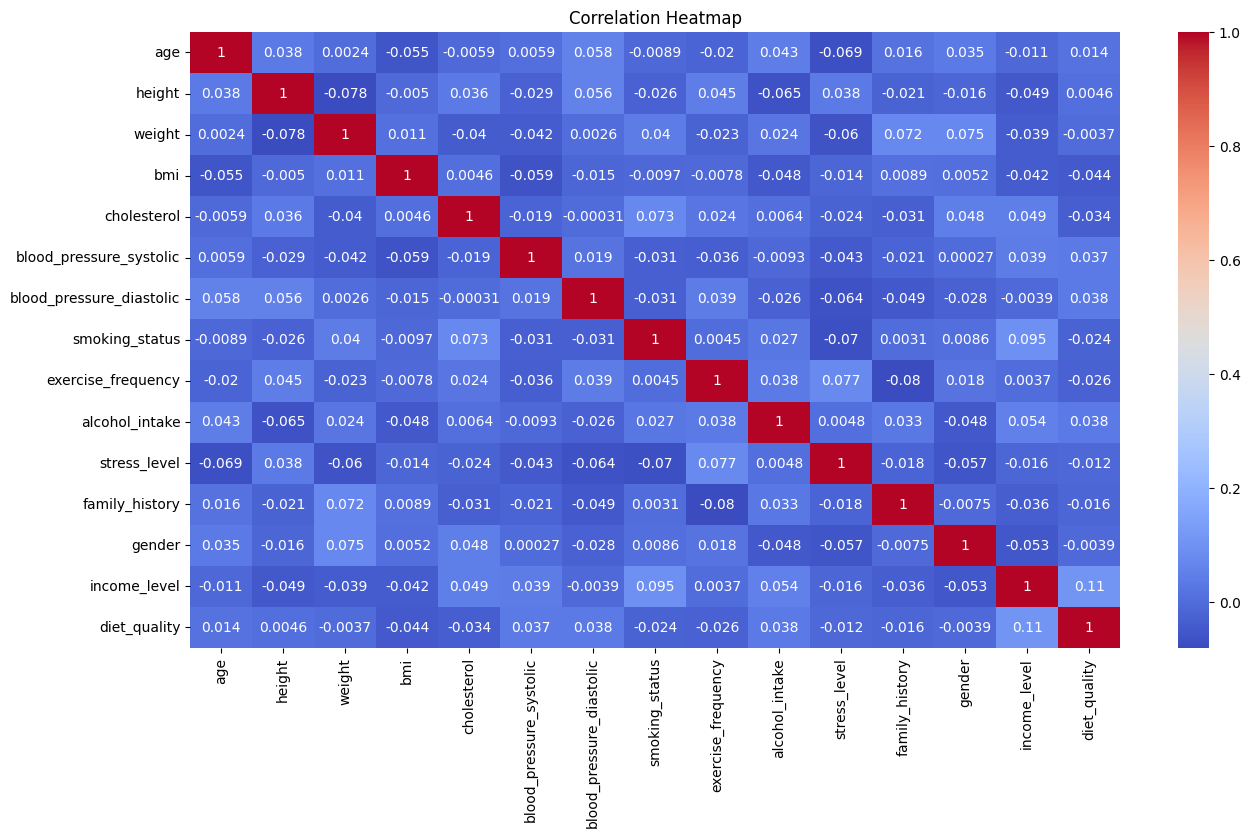

In [58]:
#Multivariate Analysis

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

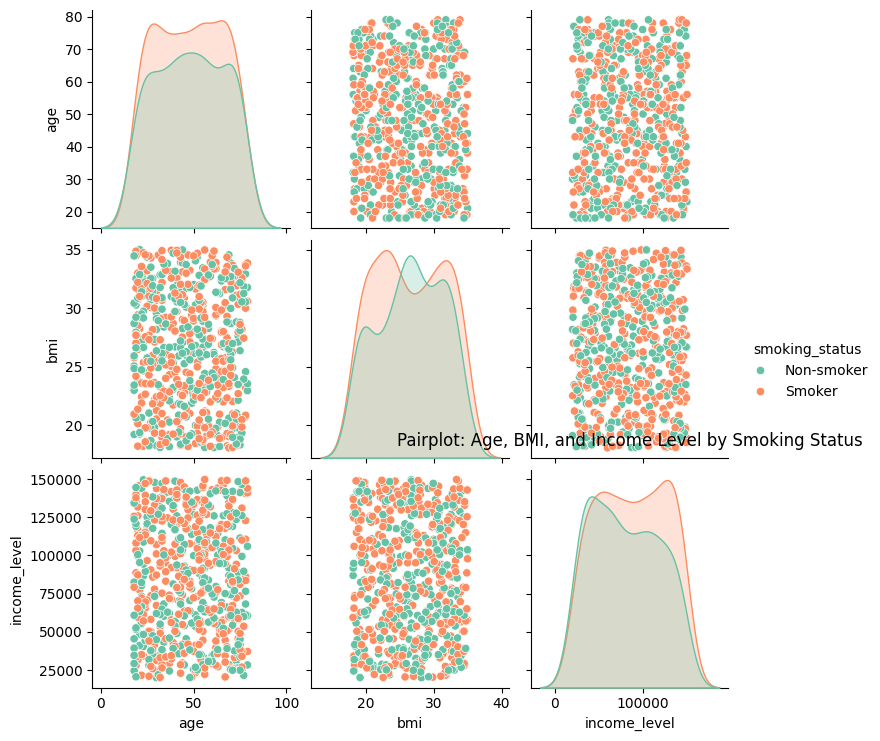

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for pairplot
selected_columns = ['age', 'bmi', 'income_level', 'smoking_status']

# Generate pairplot
sns.pairplot(df[selected_columns], hue='smoking_status', diag_kind='kde', palette='Set2')
plt.title('Pairplot: Age, BMI, and Income Level by Smoking Status')
plt.show()


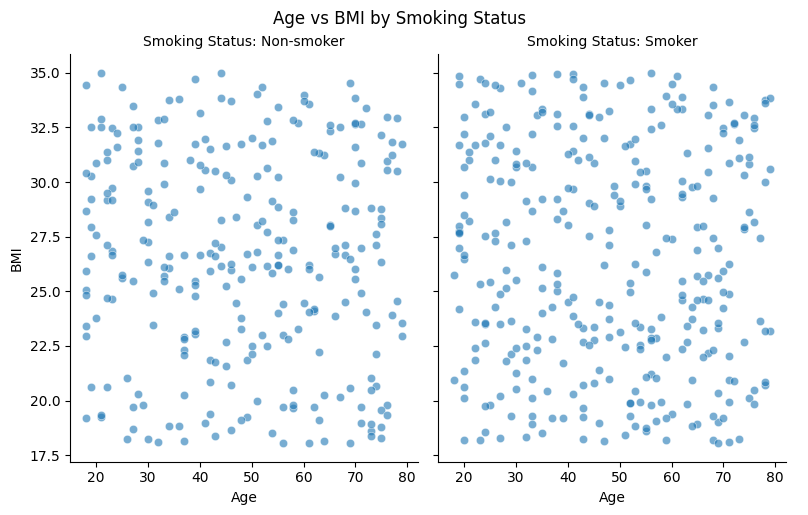

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid for age vs BMI by smoking status
g = sns.FacetGrid(df, col="smoking_status", height=5, aspect=0.8)
g.map_dataframe(sns.scatterplot, x="age", y="bmi", alpha=0.6)
g.set_axis_labels("Age", "BMI")
g.set_titles("Smoking Status: {col_name}")
g.add_legend()

plt.suptitle('Age vs BMI by Smoking Status', y=1.02)
plt.show()
